In this notebook:
1. Train a simple MLP neural network with one hidden layer and a normal activation function
2. Iteratively prune weights (ie set to zero) around a region beginning at 0.01 and doubling until it reduces the accuracy by 15%
3. Retrain the network over 30 epochs using a steepening activation function which ends as a binary decision in the last epoch
4. Visualise the weights as how they interpret an image (ie what lines they might look for) and begin looking at what are the best ones

In [1]:
import numpy as np
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
training_data = list(training_data)


import network
simple_net = network.Network([784,30,10])
simple_net.SGD(training_data, 30, 10, 3.0, test_data=test_data)

Epoch 0 : 9028 / 10000
Epoch 1 : 9209 / 10000
Epoch 2 : 9292 / 10000
Epoch 3 : 9358 / 10000
Epoch 4 : 9363 / 10000
Epoch 5 : 9404 / 10000
Epoch 6 : 9397 / 10000
Epoch 7 : 9441 / 10000
Epoch 8 : 9425 / 10000
Epoch 9 : 9410 / 10000
Epoch 10 : 9433 / 10000
Epoch 11 : 9480 / 10000
Epoch 12 : 9458 / 10000
Epoch 13 : 9485 / 10000
Epoch 14 : 9459 / 10000
Epoch 15 : 9465 / 10000
Epoch 16 : 9478 / 10000
Epoch 17 : 9428 / 10000
Epoch 18 : 9475 / 10000
Epoch 19 : 9490 / 10000
Epoch 20 : 9460 / 10000
Epoch 21 : 9487 / 10000
Epoch 22 : 9489 / 10000
Epoch 23 : 9505 / 10000
Epoch 24 : 9501 / 10000
Epoch 25 : 9515 / 10000
Epoch 26 : 9495 / 10000
Epoch 27 : 9488 / 10000
Epoch 28 : 9498 / 10000
Epoch 29 : 9488 / 10000


In [2]:
import prune
pruned_net = prune.prune_retrain(simple_net,0.01,threshold=0.15)

0.9488  without prune
0.9488  around region ± 0.01
0.9486  around region ± 0.02
0.9485  around region ± 0.04
0.9491  around region ± 0.08
0.9497  around region ± 0.16
0.9501  around region ± 0.32
0.9493  around region ± 0.64
0.9227  around region ± 1.28
0.5789  around region ± 2.56
Epoch 0 complete
Epoch 1 complete
Epoch with pruned weights around 2.56: 9478 / 10000
sparsity:  17827  / 23820 =  74.84047019311502 %


In [3]:
weights10 = pruned_net.weights[0]
weights11 = pruned_net.weights[1]
r = len(weights10[weights10 == 0.0]) + len(weights11[weights11 == 0.0])
print("sparsity: " , r, " / 23820 = "  , (r/23820) * 100 , "%" )

sparsity:  17827  / 23820 =  74.84047019311502 %


In [4]:
import networksteep
rule_net = networksteep.Network([784,30,10])
rule_net.weights = pruned_net.weights
rule_net.biases = pruned_net.biases

training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
training_data = list(training_data)
rule_net.SGD(training_data,30,10,3.0,test_data=test_data)

Epoch 0 : 9498 / 10000
Epoch 1 : 9442 / 10000
Epoch 2 : 9429 / 10000
Epoch 3 : 9425 / 10000
Epoch 4 : 9416 / 10000
Epoch 5 : 9421 / 10000


/home/jovyan/work/networksteep.py:218: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0+np.exp(- z * step))


Epoch 6 : 9434 / 10000
Epoch 7 : 9440 / 10000
Epoch 8 : 9398 / 10000
Epoch 9 : 9448 / 10000
Epoch 10 : 9427 / 10000
Epoch 11 : 9417 / 10000
Epoch 12 : 9412 / 10000
Epoch 13 : 9385 / 10000
Epoch 14 : 9387 / 10000
Epoch 15 : 9366 / 10000
Epoch 16 : 9325 / 10000
Epoch 17 : 9403 / 10000
Epoch 18 : 9384 / 10000
Epoch 19 : 9393 / 10000
Epoch 20 : 9431 / 10000
Epoch 21 : 9430 / 10000
Epoch 22 : 9415 / 10000
Epoch 23 : 9402 / 10000
Epoch 24 : 9368 / 10000
Epoch 25 : 9386 / 10000
Epoch 26 : 9429 / 10000
Epoch 27 : 9369 / 10000
Epoch 28 : 9348 / 10000
Epoch 29 : 9203 / 10000


In [5]:
weights10 = rule_net.weights[0]
weights11 = rule_net.weights[1]
r = len(weights10[weights10 == 0.0]) + len(weights11[weights11 == 0.0])
print("sparsity: " , r, " / 23820 = "  , (r/23820) * 100 , "%" )

sparsity:  17827  / 23820 =  74.84047019311502 %


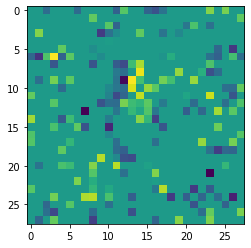

In [8]:
import matplotlib.pyplot as plt
img = rule_net.weights[0][0].reshape(28,28)
plt.imshow(img, interpolation='nearest')
plt.show()

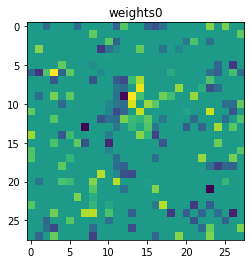

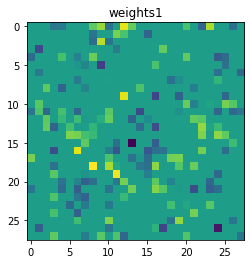

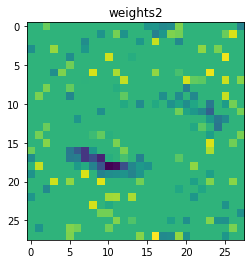

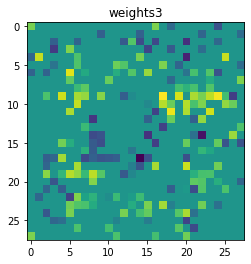

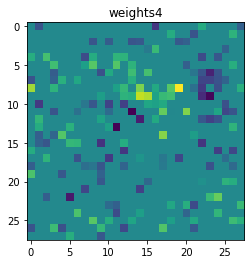

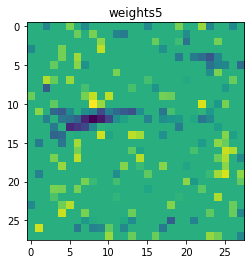

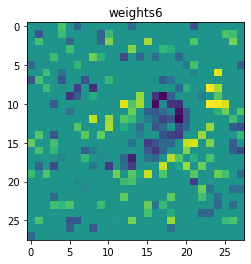

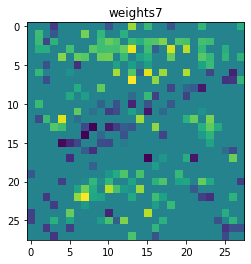

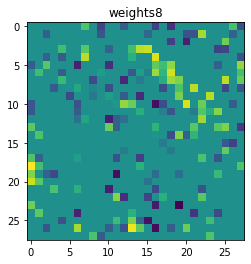

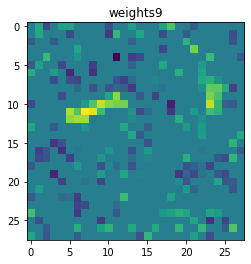

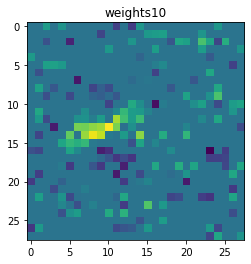

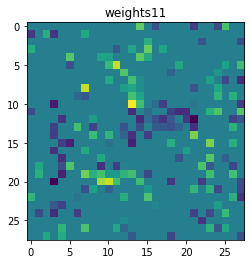

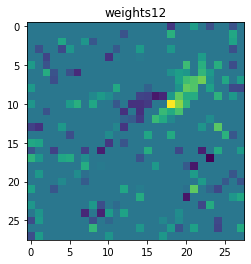

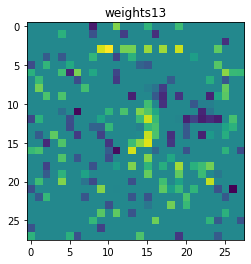

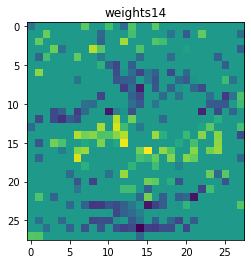

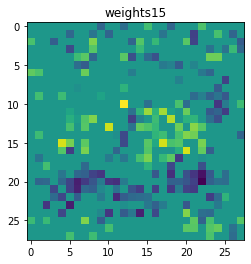

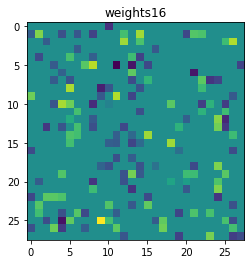

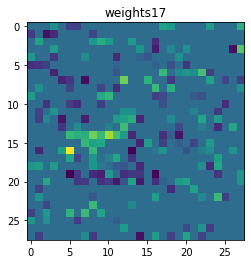

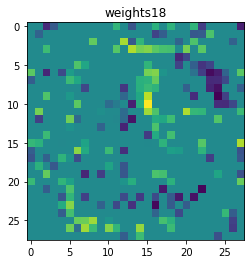

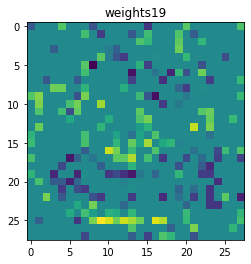

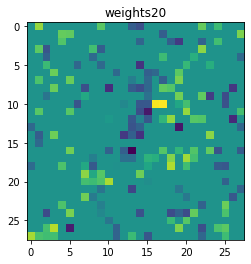

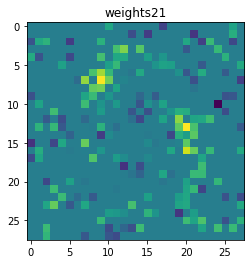

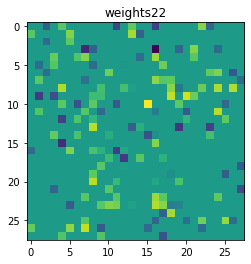

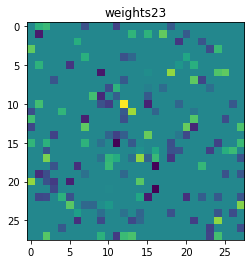

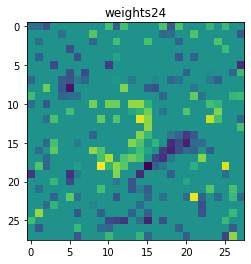

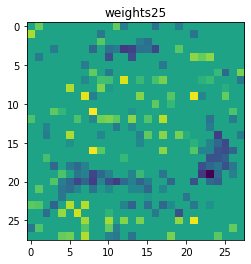

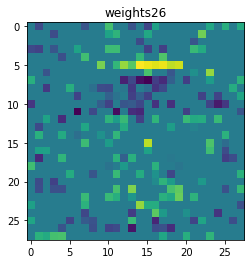

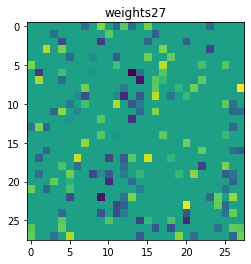

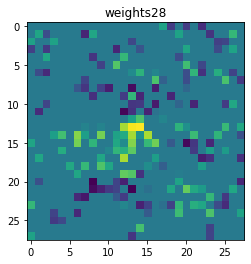

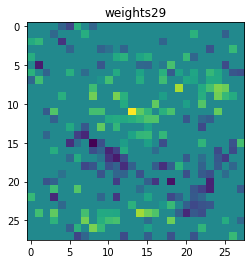

<Figure size 432x288 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt
for i in range(30):
    img = rule_net.weights[0][i].reshape(28,28)
    plt.imshow(img, interpolation='nearest')
   
    s = 'weights' + str(i) 
    plt.title(s)
    plt.show()
    plt.savefig(s + '.png')


In [18]:
len(rule_net.weights[1][0])
#try to go in and snip some solitary high weights on the assumption that they just got away with it during pruning and just happened to be big at the start

30

In [35]:
#which images does a 7 rely on?
#look for the one with the most zeros/most low hanging fruit
for i in range(10):
    print("For",  i, ":", np.count_nonzero(rule_net.weights[1][i]), "nonzeros, magnitude =", np.dot(rule_net.weights[1][i],rule_net.weights[1][i]))
    

For 0 : 19 nonzeros, magnitude = 5.9616559449169895
For 1 : 22 nonzeros, magnitude = 6.10735820791985
For 2 : 18 nonzeros, magnitude = 4.121956144226043
For 3 : 18 nonzeros, magnitude = 7.1354329725303085
For 4 : 19 nonzeros, magnitude = 37.78817162583532
For 5 : 24 nonzeros, magnitude = 22.9086310576564
For 6 : 22 nonzeros, magnitude = 96.18132252059927
For 7 : 22 nonzeros, magnitude = 11.70629151681941
For 8 : 23 nonzeros, magnitude = 20.56926861947178
For 9 : 23 nonzeros, magnitude = 13.069717252471234


In [38]:
#look for which are the most popular images
rule_net.weights[1][2][0]
for i in range(30):
    sum = 0
    for j in range(10):
        sum+=rule_net.weights[1][j][i]**2
    print("sum for image", i, "=", sum)

sum for image 0 = 1.3966837344763827
sum for image 1 = 3.0192188146877283
sum for image 2 = 39.53782085902788
sum for image 3 = 2.6079037504240716
sum for image 4 = 2.1020776500645333
sum for image 5 = 35.39012105866334
sum for image 6 = 4.364979176552084
sum for image 7 = 12.880220054590085
sum for image 8 = 2.581319536649888
sum for image 9 = 3.484654471719677
sum for image 10 = 3.939790481993884
sum for image 11 = 1.7890571386354095
sum for image 12 = 6.380994479924414
sum for image 13 = 4.450276178545419
sum for image 14 = 5.155425986133733
sum for image 15 = 8.466268718721226
sum for image 16 = 4.031627910878123
sum for image 17 = 1.8446763707248328
sum for image 18 = 2.8542919085359904
sum for image 19 = 3.416044719914185
sum for image 20 = 2.3018316753024437
sum for image 21 = 7.87255556697115
sum for image 22 = 23.10567448205545
sum for image 23 = 3.242421632899729
sum for image 24 = 2.288927384542679
sum for image 25 = 7.048807121103467
sum for image 26 = 14.79528360916473
sum

In [ ]:
#try with different dataset
#try to start writing paper
#keep sparsifying (blocksize pruning). try the number of big (define) around me within a specified area 